In [ ]:
import pathlib
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pic_path=pathlib.Path('/content/drive/MyDrive/train')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
incorrect_mask_list=list(pic_path.glob('incorrect_mask/*'))
with_mask_list=list(pic_path.glob('with_mask/*'))
without_mask_list=list(pic_path.glob('without_mask/*'))

In [ ]:
len(with_mask_list)

3966

In [ ]:
len(incorrect_mask_list)

1674

In [ ]:
len(without_mask_list)

3668

In [ ]:
pic_dict={'incorrect_mask':incorrect_mask_list,'with_mask':with_mask_list,'without_mask':without_mask_list}

In [ ]:
pic_class={'incorrect_mask':0,'with_mask':1,'without_mask':2}

In [ ]:
import numpy as np
from PIL import Image

x = []
y = []

for i in pic_dict:
  pic_path_list= pic_dict[i]
  for j in pic_path_list:
    img=cv2.imread(str(j))

    if img is None:
      print("skipping unreadable image")
      continue

    img=cv2.resize(img,(100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img /255.0
    x.append(img)
    y.append(pic_class[i])

skipping unreadable image
skipping unreadable image


In [ ]:
len(x)

9306

In [ ]:
len(y)

9306

In [ ]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [ ]:
x.shape

(9306, 100, 100, 3)

In [ ]:
y.shape

(9306,)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=1)

In [ ]:
len(xtrain),len(ytrain)

(7444, 7444)

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Input(shape=(100, 100, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # <-- 3 classes
])


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,475 (16.61 MB)

 Trainable params: 4,353,475 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist=model.fit(xtrain,ytrain,batch_size=500,epochs=20,validation_data=(xtest,ytest))

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 128s 8s/step - accuracy: 0.3906 - loss: 2.8375 - val_accuracy: 0.4452 - val_loss: 1.0265
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 125s 8s/step - accuracy: 0.4930 - loss: 0.9797 - val_accuracy: 0.7154 - val_loss: 0.7155
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 143s 8s/step - accuracy: 0.7528 - loss: 0.6381 - val_accuracy: 0.8238 - val_loss: 0.4925
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 125s 8s/step - accuracy: 0.8228 - loss: 0.4815 - val_accuracy: 0.8432 - val_loss: 0.4327
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 146s 9s/step - accuracy: 0.8461 - loss: 0.4137 - val_accuracy: 0.8528 - val_loss: 0.3961
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 138s 8s/step - accuracy: 0.8733 - loss: 0.3494 - val_accuracy: 0.8534 - val_loss: 0.3879
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 124s 8s/step - accuracy: 0.8805 - loss: 0.3231 - val_accuracy: 0.8749 - val_loss: 0.3569
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 125s 8s/step - accuracy: 0.9022 - loss: 0.2770 - val_accuracy: 0.8797 - v

In [ ]:
model.save("mask.h5")

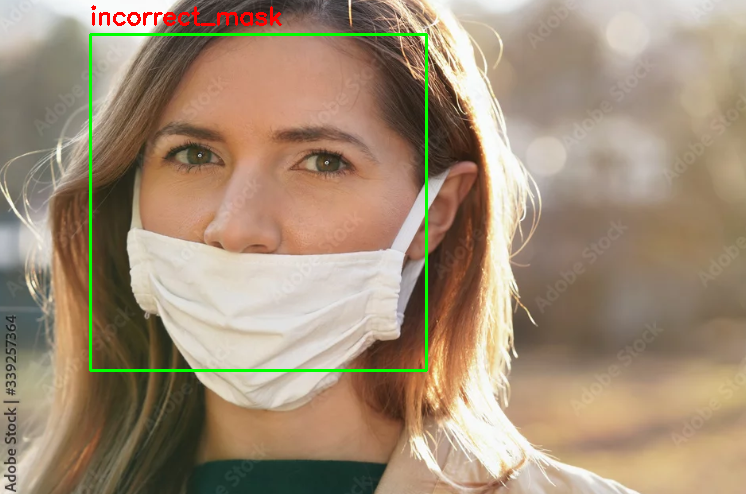

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Load the trained mask detection model
model = tf.keras.models.load_model('mask.h5')

# Label mapping
labels = {0: 'incorrect_mask', 1: 'with_mask', 2: 'without_mask'}

# Load Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces_and_predict_mask(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face_resized = cv2.resize(face_rgb, (100, 100))
        face_normalized = face_resized / 255.0
        face_input = np.expand_dims(face_normalized, axis=0)

        prediction = model.predict(face_input, verbose=0)
        label = labels[np.argmax(prediction)]

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.8, color=(0, 0, 255), thickness=2)

    return frame

# Path to test image
image_path = '/content/Screenshot 2025-05-15 125256.png'
frame = cv2.imread(image_path)

if frame is None:
    print("Error: Could not load image.")
else:
    output = detect_faces_and_predict_mask(frame)
    cv2_imshow(output)